<a href="https://colab.research.google.com/github/fridaruh/Curso_Intro_AI_Crehana/blob/master/Crehana_PLN_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [ ]:
import tweepy
import pandas as pd

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
twitter_users = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search, q='black friday', count= 1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'es':
      twitter_users.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

Ejemplo cambiando parámetros:

In [ ]:
twitter_users_2 = []
tweet_time_2 = []
tweet_string_2 = []

for tweet in tweepy.Cursor(api.search, q='@Fridaruh', count= 1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en':
      twitter_users_2.append(tweet.user.name)
      tweet_time_2.append(tweet.created_at)
      tweet_string_2.append(tweet.text)

In [ ]:
df = pd.DataFrame({'name':twitter_users, 'time':tweet_time, 'tweet':tweet_string })

Exportamos el dataframe a un archivo csv

In [ ]:
df.to_csv('tweets_black_friday.csv')

En caso de que no tengas acceso a la API, tendrás que ejecutar esta celda donde importas el archivo csv

In [ ]:
df = pd.read_csv('/content/tweets_black_friday.csv')

In [ ]:
df.head()

,name,time,tweet
0,Marc,2021-11-24 19:16:19,"Ah, que el que compres en black friday t’ho co..."
1,rodríguez🇪🇸,2021-11-24 19:16:19,estoy con 70€ menos y solo llevamos 15 minutos...
2,Ajuntament de Sueca,2021-11-24 19:16:00,💉 Punto de vacunación masiva sin cita previa e...
3,Ocio Central,2021-11-24 19:15:58,⬛◼️◾BLACK FRIDAY◾◼️⬛\n\n🛒Sólo en tienda física...
4,Francis,2021-11-24 19:15:55,@SantiRosell Eso decía yo. Pero como está el B...


Convierto los tweets a listas

In [ ]:
data = df['tweet'].to_list()

In [ ]:
data

In [ ]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  texto.append(token_2)

In [ ]:
#texto es una lista de listas 

In [ ]:
#texto

In [ ]:
flatten = [w for l in texto for w in l]

In [ ]:
import string
puntuacion = list(string.punctuation)

In [ ]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
puntuacion.append('https')
puntuacion.append('co')
puntuacion.append('t')

In [ ]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'https',
 'co',
 't']

In [ ]:
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_2 = [w for w in flatten if w not in stop_words_n]

In [ ]:
df_3 = [w for w in df_2 if w not in puntuacion]

In [ ]:
freq_words = nltk.FreqDist(df_3)

In [ ]:
freq_words.most_common(15)

[('black', 28),
 ('friday', 28),
 ('semana', 5),
 ('descuento', 4),
 ('2021', 4),
 ('ofertas', 4),
 ('hogar', 4),
 ('menos', 3),
 ('viernes', 3),
 ('10', 3),
 ('si', 3),
 ('monta', 3),
 ('conectado', 3),
 ('completo', 3),
 ('compatible', 3)]

In [ ]:
omitir_palabras = ['black','friday','2021','ofertas','semana']

In [ ]:
df_4 =  [w for w in df_3 if w not in omitir_palabras]

In [ ]:
freq_words = nltk.FreqDist(df_4)

In [ ]:
freq_words.most_common(15)

[('descuento', 4),
 ('hogar', 4),
 ('menos', 3),
 ('viernes', 3),
 ('10', 3),
 ('si', 3),
 ('monta', 3),
 ('conectado', 3),
 ('completo', 3),
 ('compatible', 3),
 ('apple', 3),
 ('homekit', 3),
 ('15', 2),
 ('26', 2),
 ('27', 2)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

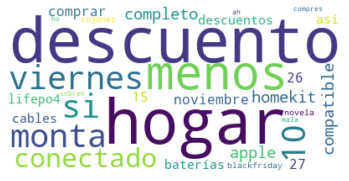

In [ ]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()